In [1]:
import pandas as pd  # Pandas for data manipulation and analysis (# Pandas для маніпуляцій та аналізу даних)
import matplotlib.pyplot as plt  # Matplotlib for basic plotting (# Matplotlib для базового малювання графіків)
import seaborn as sns  # Seaborn for statistical data visualization (# Seaborn для статистичної візуалізації даних)
from datetime import date  # Date module for working with dates (# Модуль Date для роботи з датами)
from dateutil.rrule import rrule, DAILY  # rrule for creating date ranges (# rrule для створення діапазонів дат)
import numpy as np  # NumPy for numerical operations (# NumPy для числових операцій)
import re  # Regular expressions for string matching and manipulation (# Регулярні вирази для роботи з рядками)


# Впевнення, що графіки Matplotlib відображаються вбудовано у Jupyter Notebook (# Ensuring Matplotlib plots are displayed inline in the Jupyter Notebook)
%matplotlib inline
# Встановлення розміру за замовчуванням для графіків Matplotlib: 9x6 дюймів (# Setting the default figure size for Matplotlib plots to 9x6 inches)
plt.rcParams['figure.figsize'] = (9,6)
# Налаштування Pandas для виведення всіх стовпців у DataFrame (# Configuring Pandas to display all columns in DataFrame outputs)
pd.pandas.set_option('display.max_columns',None)

In [2]:
pur = pd.read_csv("QVI_purchase_behaviour.csv")
print(pur.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [3]:
pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
pur.value_counts("LIFESTAGE")

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [5]:
pur.value_counts("PREMIUM_CUSTOMER")

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [6]:
pur.describe()

LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06

In [7]:
tran = pd.read_excel("QVI_transaction_data.xlsx")
print(tran.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [8]:
# Прочитать файл Excel
df = pd.read_excel("QVI_transaction_data.xlsx")

# Преобразовать числа в формат даты
df['DATE'] = pd.to_datetime(df['DATE'], unit='D', origin='1899-12-30')

# Преобразовать формат даты в "год-месяц-день"
df['DATE'] = df['DATE'].dt.strftime('%Y-%m-%d')

# Вывести результат
print(df)

              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1            1000       1         5   
1       2019-05-14          1            1307     348        66   
2       2019-05-20          1            1343     383        61   
3       2018-08-17          2            2373     974        69   
4       2018-08-18          2            2426    1038       108   
...            ...        ...             ...     ...       ...   
264831  2019-03-09        272          272319  270088        89   
264832  2018-08-13        272          272358  270154        74   
264833  2018-11-06        272          272379  270187        51   
264834  2018-12-27        272          272379  270188        42   
264835  2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g   

In [9]:
# Преобразовать числа в формат даты
tran['DATE'] = pd.to_datetime(tran['DATE'], unit='D', origin='1899-12-30')

# Преобразовать формат даты в "год-месяц-день"
tran['DATE'] = tran['DATE'].dt.strftime('%Y-%m-%d')

# Display the first few rows of the DataFrame to inspect the data
print(tran.head())

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  2018-10-17          1            1000       1         5   
1  2019-05-14          1            1307     348        66   
2  2019-05-20          1            1343     383        61   
3  2018-08-17          2            2373     974        69   
4  2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [10]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [11]:
tran.describe()

STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  264836.00000    2.648360e+05  2.648360e+05  264836.000000   
mean      135.08011    1.355495e+05  1.351583e+05      56.583157   
std        76.78418    8.057998e+04  7.813303e+04      32.826638   
min         1.00000    1.000000e+03  1.000000e+00       1.000000   
25%        70.00000    7.002100e+04  6.760150e+04      28.000000   
50%       130.00000    1.303575e+05  1.351375e+05      56.000000   
75%       203.00000    2.030942e+05  2.027012e+05      85.000000   
max       272.00000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  
mean        1.907309       7.304200  
std         0.643654       3.083226  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max       200.000000     650.000000

In [12]:
tran.value_counts("DATE")

DATE
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: count, Length: 364, dtype: int64

In [13]:
tran.value_counts("STORE_NBR")

STORE_NBR
226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
211       2
206       2
11        2
92        1
76        1
Name: count, Length: 272, dtype: int64

In [14]:
tran.value_counts("LYLTY_CARD_NBR")

LYLTY_CARD_NBR
162039     18
172032     18
13138      17
116181     17
128178     17
           ..
143033      1
143029      1
143027      1
143026      1
2373711     1
Name: count, Length: 72637, dtype: int64

In [15]:
tran.value_counts("TXN_ID")

TXN_ID
211119     3
1162       3
102237     3
222775     3
228741     3
          ..
90369      1
90370      1
90371      1
90372      1
2415841    1
Name: count, Length: 263127, dtype: int64

In [16]:
tran.value_counts("PROD_NBR")

PROD_NBR
102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: count, Length: 114, dtype: int64

In [17]:
tran.value_counts("PROD_QTY")

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [18]:
tran.value_counts("TOT_SALES")

TOT_SALES
9.2      22821
7.4      22513
6.0      20798
7.6      20212
8.8      19900
         ...  
9.3          3
6.9          3
12.4         2
11.2         2
650.0        2
Name: count, Length: 112, dtype: int64

In [19]:
# Print the minimum and maximum unemployment rates during 2021
min_rate=tran["DATE"].min()
max_rate=tran["DATE"].max()

print(min_rate, max_rate)

2018-07-01 2019-06-30


In [20]:
# Print the mean and standard deviation of rates by year
print(tran[["STORE_NBR", "TOT_SALES"]].agg(["mean", "std"]))

      STORE_NBR  TOT_SALES
mean  135.08011   7.304200
std    76.78418   3.083226


In [21]:
# Print yearly mean and standard deviation grouped by continent
# Print(tran.groupby("STORE_NBR").agg(["mean", "std"]))
# Групуємо за магазинами і обчислюємо середнє значення та стандартне відхилення продажів для кожного магазину
sales_stats_by_store = tran.groupby("STORE_NBR")["TOT_SALES"].agg(["mean", "std"])
# Виводимо результат
print(sales_stats_by_store)

               mean       std
STORE_NBR                    
1          4.177312  1.957800
2          3.964032  1.900935
3          8.523602  1.939841
4          8.729231  1.712983
5          6.980749  2.332084
...             ...       ...
268        4.763828  2.627577
269        6.983074  2.417766
270        6.928804  2.495050
271        7.019350  2.366905
272        8.266341  2.116321

[272 rows x 2 columns]


In [22]:
sales_by_store = tran.groupby("STORE_NBR")["TOT_SALES"].sum()
print(sales_by_store)

STORE_NBR
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: TOT_SALES, Length: 272, dtype: float64


In [23]:
# Replace 'CorrectColumnName' with the actual name of the column containing the unemployment rate
sales_summary = tran.groupby("STORE_NBR").agg(
    # Create the sum_rate_2018 column
    TOT_SALES_sum=('TOT_SALES', 'sum'),
    # Create the std_rate_2021 column
    TOT_SALES_std=('TOT_SALES', 'std'),
)
print(sales_summary)

           TOT_SALES_sum  TOT_SALES_std
STORE_NBR                              
1                2393.60       1.957800
2                2005.80       1.900935
3               12802.45       1.939841
4               14647.65       1.712983
5                9500.80       2.332084
...                  ...            ...
268              2601.05       2.627577
269             11221.80       2.417766
270             11293.95       2.495050
271              9721.80       2.366905
272              4653.95       2.116321

[272 rows x 2 columns]


In [24]:
#checking for missing values 
print(tran.isna().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [25]:
#cheking for missing values 
print(pur.isna().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [26]:
# merged_data = pd.merge(pur, tran, on = "LYLTY_CARD_NBR", how = "right")
# Передбачаючи, що "LYLTY_CARD_NBR" - це спільний стовпець у двох DataFrame
merged_data = pd.merge(tran, pur, on="LYLTY_CARD_NBR", how="right")

In [27]:
merged_data 

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1            1000       1         5   
1       2018-09-16          1            1002       2        58   
2       2019-03-07          1            1003       3        52   
3       2019-03-08          1            1003       4       106   
4       2018-11-02          1            1004       5        96   
...            ...        ...             ...     ...       ...   
264831  2018-12-08         88         2370701  240378        24   
264832  2018-10-01         88         2370751  240394        60   
264833  2018-10-24         88         2370961  240480        70   
264834  2018-10-27         88         2370961  240481        65   
264835  2018-12-14         88         2373711  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7   
2          Grain Waves Sour    Cream&Chives 210G         1        3.6   
3         Natural ChipCo      Hony Soy Chckn175g         1        3.0   
4                 WW Original Stacked Chips 160g         1        1.9   
...                                          ...       ...        ...   
264831     Grain Waves         Sweet Chilli 210g         2        7.2   
264832      Kettle Tortilla ChpsFeta&Garlic 150g         2        9.2   
264833   Tyrrells Crisps     Lightly Salted 165g         2        8.4   
264834  Old El Paso Salsa   Dip Chnky Tom Ht300g         2       10.2   
264835  Smiths Crinkle Chips Salt & Vinegar 330g         2       11.4   

                    LIFESTAGE PREMIUM_CUSTOMER  
0       YOUNG SINGLES/COUPLES          Premium  
1       YOUNG SINGLES/COUPLES       Mainstream  
2              YOUNG FAMILIES           Budget  
3              YOUNG FAMILIES           Budget  
4       OLDER SINGLES/COUPLES       Mainstream  
...                       ...              ...  
264831         YOUNG FAMILIES       Mainstream  
264832         YOUNG FAMILIES          Premium  
264833         OLDER FAMILIES           Budget  
264834         OLDER FAMILIES           Budget  
264835  YOUNG SINGLES/COUPLES       Mainstream  

[264836 rows x 10 columns]

In [28]:
merged_data.describe()

STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  264836.00000    2.648360e+05  2.648360e+05  264836.000000   
mean      135.08011    1.355495e+05  1.351583e+05      56.583157   
std        76.78418    8.057998e+04  7.813303e+04      32.826638   
min         1.00000    1.000000e+03  1.000000e+00       1.000000   
25%        70.00000    7.002100e+04  6.760150e+04      28.000000   
50%       130.00000    1.303575e+05  1.351375e+05      56.000000   
75%       203.00000    2.030942e+05  2.027012e+05      85.000000   
max       272.00000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  
mean        1.907309       7.304200  
std         0.643654       3.083226  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max       200.000000     650.000000

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  object 
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 20.2+ MB


In [30]:
merged_data[merged_data["PROD_QTY"].isin([200])]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
221625  2018-08-19        226          226000  226201         4   
221626  2019-05-20        226          226000  226210         4   

                               PROD_NAME  PROD_QTY  TOT_SALES       LIFESTAGE  \
221625  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   
221626  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   

       PREMIUM_CUSTOMER  
221625          Premium  
221626          Premium

In [31]:
merged_data[merged_data["PROD_QTY"]>5]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
221625  2018-08-19        226          226000  226201         4   
221626  2019-05-20        226          226000  226210         4   

                               PROD_NAME  PROD_QTY  TOT_SALES       LIFESTAGE  \
221625  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   
221626  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   

       PREMIUM_CUSTOMER  
221625          Premium  
221626          Premium

In [32]:
merged_data.drop(merged_data[merged_data["PROD_QTY"].astype(str).str.contains("200")].index, inplace = True)
merged_data

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1            1000       1         5   
1       2018-09-16          1            1002       2        58   
2       2019-03-07          1            1003       3        52   
3       2019-03-08          1            1003       4       106   
4       2018-11-02          1            1004       5        96   
...            ...        ...             ...     ...       ...   
264831  2018-12-08         88         2370701  240378        24   
264832  2018-10-01         88         2370751  240394        60   
264833  2018-10-24         88         2370961  240480        70   
264834  2018-10-27         88         2370961  240481        65   
264835  2018-12-14         88         2373711  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7   
2          Grain Waves Sour    Cream&Chives 210G         1        3.6   
3         Natural ChipCo      Hony Soy Chckn175g         1        3.0   
4                 WW Original Stacked Chips 160g         1        1.9   
...                                          ...       ...        ...   
264831     Grain Waves         Sweet Chilli 210g         2        7.2   
264832      Kettle Tortilla ChpsFeta&Garlic 150g         2        9.2   
264833   Tyrrells Crisps     Lightly Salted 165g         2        8.4   
264834  Old El Paso Salsa   Dip Chnky Tom Ht300g         2       10.2   
264835  Smiths Crinkle Chips Salt & Vinegar 330g         2       11.4   

                    LIFESTAGE PREMIUM_CUSTOMER  
0       YOUNG SINGLES/COUPLES          Premium  
1       YOUNG SINGLES/COUPLES       Mainstream  
2              YOUNG FAMILIES           Budget  
3              YOUNG FAMILIES           Budget  
4       OLDER SINGLES/COUPLES       Mainstream  
...                       ...              ...  
264831         YOUNG FAMILIES       Mainstream  
264832         YOUNG FAMILIES          Premium  
264833         OLDER FAMILIES           Budget  
264834         OLDER FAMILIES           Budget  
264835  YOUNG SINGLES/COUPLES       Mainstream  

[264834 rows x 10 columns]

In [33]:
merged_data["DATE"].describe()

count         264834
unique           364
top       2018-12-24
freq             939
Name: DATE, dtype: object

In [34]:
#date_count = merged_data.groupby("DATE").sum()
#date_count

In [35]:
#def func(x):
#  lst = []
#    for i in x:
#        if i in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
#            lst.append(i)
#   return "".join(lst)

In [36]:
#merged_data["pack_size"] = merged_data["PROD_NAME"].apply(func)
#merged_data

In [37]:
#sns.pairplot(merged_data[merged_data.columns.drop("PROD_NAME")])

In [38]:
merged_data.describe()

STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  264834.000000    2.648340e+05  2.648340e+05  264834.000000   
mean      135.079423    1.355488e+05  1.351576e+05      56.583554   
std        76.784063    8.057990e+04  7.813292e+04      32.826444   
min         1.000000    1.000000e+03  1.000000e+00       1.000000   
25%        70.000000    7.002100e+04  6.760050e+04      28.000000   
50%       130.000000    1.303570e+05  1.351365e+05      56.000000   
75%       203.000000    2.030940e+05  2.026998e+05      85.000000   
max       272.000000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264834.000000  264834.000000  
mean        1.905813       7.299346  
std         0.343436       2.527241  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max         5.000000      29.500000

In [39]:
merged_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<Axes: ylabel='LIFESTAGE'>

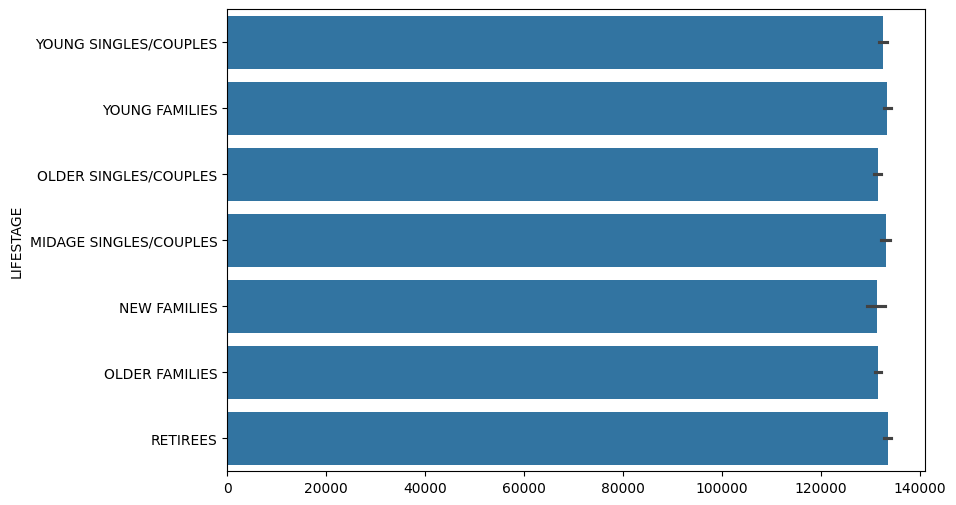

In [40]:
sns.barplot(merged_data["LIFESTAGE"])

In [41]:
merged_data[["TOT_SALES", "PREMIUM_CUSTOMER"]].groupby("PREMIUM_CUSTOMER").sum().sort_values(by = "TOT_SALES", ascending = False)

TOT_SALES
PREMIUM_CUSTOMER           
Mainstream        750744.50
Budget            676211.55
Premium           506158.95

In [42]:
new = merged_data[["LIFESTAGE", "PREMIUM_CUSTOMER", "TOT_SALES"]].groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).sum()
new

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             35514.80
                       Mainstream         90803.85
                       Premium            58432.65
NEW FAMILIES           Budget             21928.45
                       Mainstream         17013.90
                       Premium            11491.10
OLDER FAMILIES         Budget            168363.25
                       Mainstream        103445.55
                       Premium            80658.40
OLDER SINGLES/COUPLES  Budget            136769.80
                       Mainstream        133393.80
                       Premium           132263.15
RETIREES               Budget            113147.80
                       Mainstream        155677.05
                       Premium            97646.05
YOUNG FAMILIES         Budget            139345.85
                       Mainstream         92788.75
                       Premium            84025.50
YOUNG SINGLES/COUPLES  Budget             61141.60
                       Mainstream        157621.60
                       Premium            41642.10

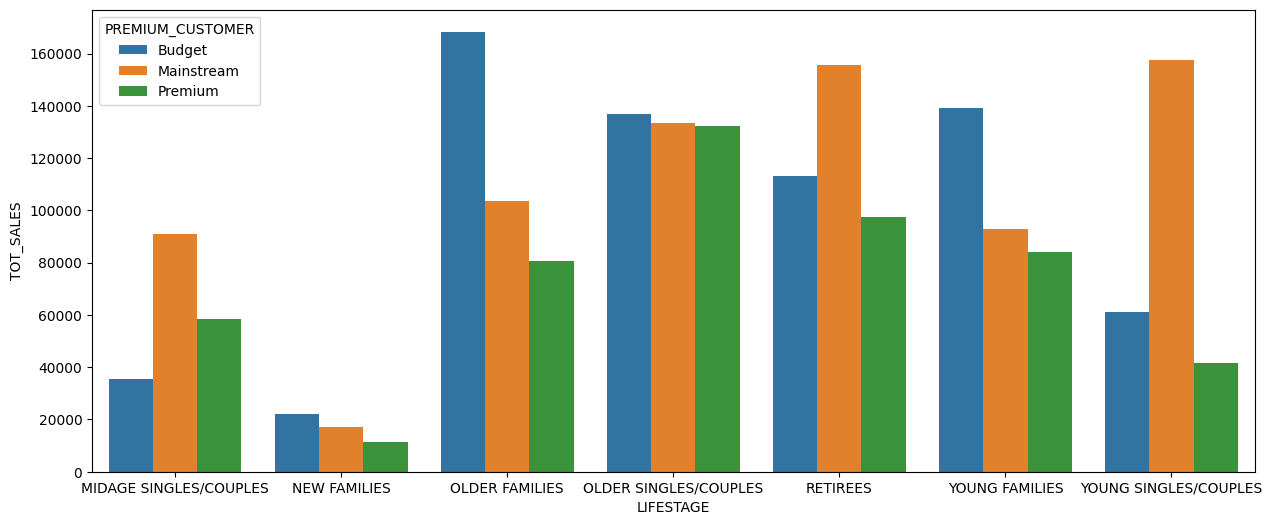

In [43]:
plt.figure(figsize=(15, 6))
sns.barplot(x=new.reset_index()["LIFESTAGE"], y=new.reset_index()["TOT_SALES"], hue=new.reset_index()["PREMIUM_CUSTOMER"])
plt.show()

In [44]:
new1 = merged_data.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"]).count()
new

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             35514.80
                       Mainstream         90803.85
                       Premium            58432.65
NEW FAMILIES           Budget             21928.45
                       Mainstream         17013.90
                       Premium            11491.10
OLDER FAMILIES         Budget            168363.25
                       Mainstream        103445.55
                       Premium            80658.40
OLDER SINGLES/COUPLES  Budget            136769.80
                       Mainstream        133393.80
                       Premium           132263.15
RETIREES               Budget            113147.80
                       Mainstream        155677.05
                       Premium            97646.05
YOUNG FAMILIES         Budget            139345.85
                       Mainstream         92788.75
                       Premium            84025.50
YOUNG SINGLES/COUPLES  Budget             61141.60
                       Mainstream        157621.60
                       Premium            41642.10

In [45]:
new = merged_data[["LIFESTAGE","PREMIUM_CUSTOMER","TOT_SALES"]].groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).sum()
new

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             35514.80
                       Mainstream         90803.85
                       Premium            58432.65
NEW FAMILIES           Budget             21928.45
                       Mainstream         17013.90
                       Premium            11491.10
OLDER FAMILIES         Budget            168363.25
                       Mainstream        103445.55
                       Premium            80658.40
OLDER SINGLES/COUPLES  Budget            136769.80
                       Mainstream        133393.80
                       Premium           132263.15
RETIREES               Budget            113147.80
                       Mainstream        155677.05
                       Premium            97646.05
YOUNG FAMILIES         Budget            139345.85
                       Mainstream         92788.75
                       Premium            84025.50
YOUNG SINGLES/COUPLES  Budget             61141.60
                       Mainstream        157621.60
                       Premium            41642.10

In [46]:
#Most sold chip products
sales_by_products = merged_data[["PROD_NAME","TOT_SALES"]].groupby(["PROD_NAME"]).sum()
# Сортуємо DataFrame за значенням стовпця "TOT_SALES" у порядку зростання
sorted_sales_by_products = sales_by_products.sort_values(by='TOT_SALES')
# Виводимо відфільтровані дані
print(sorted_sales_by_products)

                                          TOT_SALES
PROD_NAME                                          
Woolworths Medium   Salsa 300g               4050.0
Woolworths Mild     Salsa 300g               4234.5
WW Crinkle Cut      Original 175g            4532.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Chicken 175g             4702.2
...                                             ...
Smiths Crinkle      Original 330g           34302.6
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Dorito Corn Chp     Supreme 380g            39052.0

[114 rows x 1 columns]


In [47]:
#Most sold chip products
count_by_products = merged_data[["PROD_NAME","TOT_SALES"]].groupby(["PROD_NAME"]).count()
# Сортуємо DataFrame за значенням стовпця "TOT_SALES" у порядку зростання
sorted_count_by_products = count_by_products.sort_values(by='TOT_SALES')
# Виводимо відфільтровані дані
print(sorted_count_by_products)

                                          TOT_SALES
PROD_NAME                                          
WW Crinkle Cut      Original 175g              1410
French Fries Potato Chips 175g                 1418
NCC Sour Cream &    Garden Chives 175g         1419
Woolworths Medium   Salsa 300g                 1430
RRD Pc Sea Salt     165g                       1431
...                                             ...
Cobs Popd Sea Salt  Chips 110g                 3265
Tyrrells Crisps     Ched & Chives 165g         3268
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g       3269
Kettle Tortilla ChpsHny&Jlpno Chili 150g       3296
Kettle Mozzarella   Basil & Pesto 175g         3304

[114 rows x 1 columns]


In [48]:
#Most sold chip products
sales_by_lifestage = merged_data[["LIFESTAGE","TOT_SALES"]].groupby(["LIFESTAGE"]).sum()
# Сортуємо DataFrame за значенням стовпця "TOT_SALES" у порядку зростання
sorted_sales_by_lifestage = sales_by_products.sort_values(by='TOT_SALES')
# Виводимо відфільтровані дані
print(sorted_sales_by_lifestage)

                                          TOT_SALES
PROD_NAME                                          
Woolworths Medium   Salsa 300g               4050.0
Woolworths Mild     Salsa 300g               4234.5
WW Crinkle Cut      Original 175g            4532.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Chicken 175g             4702.2
...                                             ...
Smiths Crinkle      Original 330g           34302.6
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Dorito Corn Chp     Supreme 380g            39052.0

[114 rows x 1 columns]


In [49]:
#7. Which brand has the highest number of total sales in chips? 
#This question will help us to find which brand has better performance and which doesn't. 

In [50]:
sales_by_products = merged_data[["PROD_NAME","TOT_SALES"]].groupby(["PROD_NAME"]).sum()
sales_by_products

TOT_SALES
PROD_NAME                                        
Burger Rings 220g                          6831.0
CCs Nacho Cheese    175g                   5961.9
CCs Original 175g                          6048.0
CCs Tasty Cheese    175g                   6069.0
Cheetos Chs & Bacon Balls 190g             9243.3
...                                           ...
WW Sour Cream &OnionStacked Chips 160g     5323.8
WW Supreme Cheese   Corn Chips 200g        5390.3
Woolworths Cheese   Rings 190g             5169.6
Woolworths Medium   Salsa 300g             4050.0
Woolworths Mild     Salsa 300g             4234.5

[114 rows x 1 columns]

In [51]:
sales_by_customer = merged_data[["PREMIUM_CUSTOMER","TOT_SALES"]].groupby(["PREMIUM_CUSTOMER"]).sum()
sales_by_customer

TOT_SALES
PREMIUM_CUSTOMER           
Budget            676211.55
Mainstream        750744.50
Premium           506158.95

In [52]:
sales_by_customer = merged_data[["LIFESTAGE","PROD_NAME","TOT_SALES"]].groupby(["LIFESTAGE","PROD_NAME"]).sum()
sales_by_customer

TOT_SALES
LIFESTAGE              PROD_NAME                                        
MIDAGE SINGLES/COUPLES Burger Rings 220g                           660.1
                       CCs Nacho Cheese    175g                    638.4
                       CCs Original 175g                           550.2
                       CCs Tasty Cheese    175g                    529.2
                       Cheetos Chs & Bacon Balls 190g              861.3
...                                                                  ...
YOUNG SINGLES/COUPLES  WW Sour Cream &OnionStacked Chips 160g      647.9
                       WW Supreme Cheese   Corn Chips 200g         619.4
                       Woolworths Cheese   Rings 190g              604.8
                       Woolworths Medium   Salsa 300g              435.0
                       Woolworths Mild     Salsa 300g              573.0

[798 rows x 1 columns]

In [53]:
max_sales_index = sales_by_customer['TOT_SALES'].idxmax()
max_sales_value = sales_by_customer.loc[max_sales_index, 'TOT_SALES']

print("Maximum Sales:")
print("Lifestage:", max_sales_index[0])
print("Product Name:", max_sales_index[1])
print("Total Sales:", max_sales_value)

Maximum Sales:
Lifestage: OLDER SINGLES/COUPLES
Product Name: Dorito Corn Chp     Supreme 380g
Total Sales: 8459.75


In [54]:
sales_by_lifestage = merged_data[["LIFESTAGE","TOT_SALES"]].groupby(["LIFESTAGE"]).sum()
sales_by_lifestage

TOT_SALES
LIFESTAGE                        
MIDAGE SINGLES/COUPLES  184751.30
NEW FAMILIES             50433.45
OLDER FAMILIES          352467.20
OLDER SINGLES/COUPLES   402426.75
RETIREES                366470.90
YOUNG FAMILIES          316160.10
YOUNG SINGLES/COUPLES   260405.30

In [55]:
# Convert the 'Date' column to datetime format)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

# Create a new column with month and year
df['Month_Year'] = df['DATE'].dt.to_period('M')

In [56]:
sales_by_date = merged_data[["DATE","TOT_SALES"]].groupby(["DATE"]).sum()
# Сортуємо DataFrame за значенням стовпця "TOT_SALES" у порядку зростання
sorted_sales_by_date = sales_by_date.sort_values(by='TOT_SALES')
# Виводимо відфільтровані дані
print(sorted_sales_by_date)

            TOT_SALES
DATE                 
2019-05-18    4036.50
2019-05-15    4060.30
2019-05-17    4192.45
2018-08-20    4198.20
2018-08-19    4309.75
...               ...
2018-12-20    6300.80
2018-12-22    6558.70
2018-12-19    6639.80
2018-12-23    6826.00
2018-12-24    6923.00

[364 rows x 1 columns]


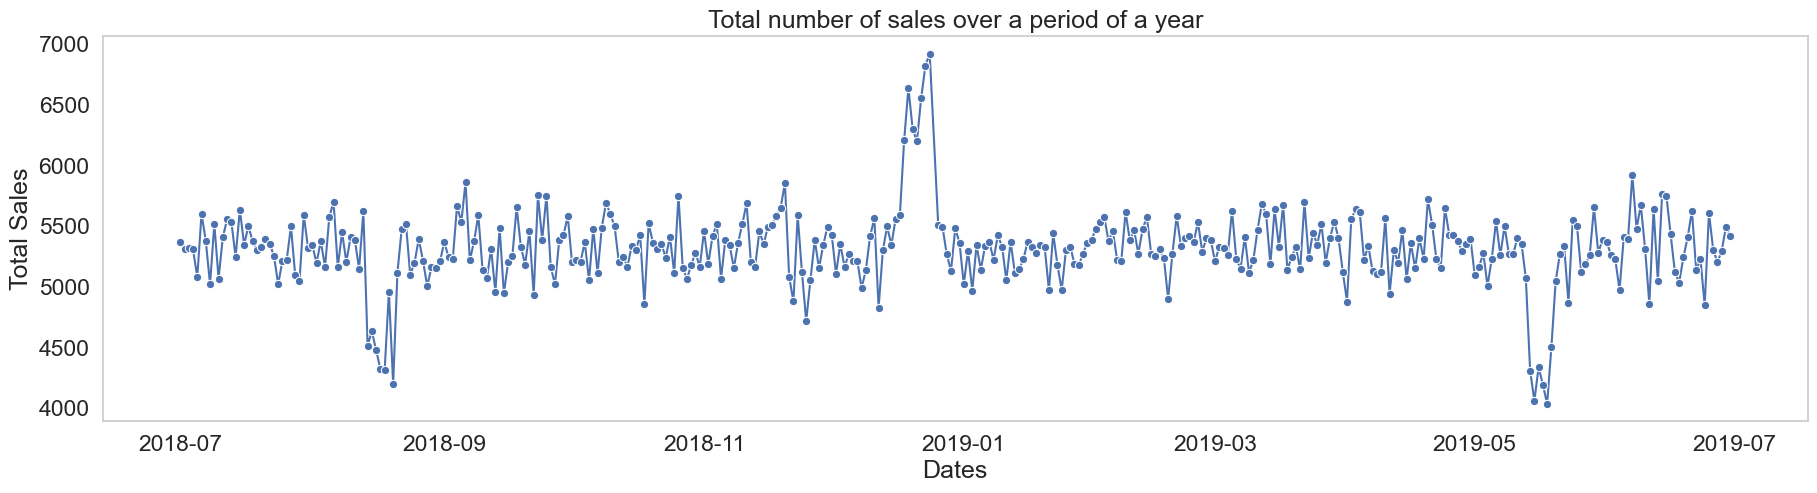

In [57]:
#What are the total number of chips sold over a period of a year?
#The question will help us to identify in what month do we need to increase the chips stock quantity 
#and in what month we need to reduce the importing of chips product.

X = df.groupby("DATE")["TOT_SALES"].sum()
dt = X.keys()
sales = X.tolist()

sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize=(22,5))
sns.lineplot(x=dt, y = sales ,marker="o")
plt.title("Total number of sales over a period of a year")
plt.xlabel("Dates")
plt.ylabel("Total Sales")
plt.grid(axis="both")
plt.show()

In [58]:
##The total number of chips sold in February to March and November to December have been enormously declined and the chips products are sold most in the near of christmas

In [59]:
##What are the total number of chips sold in individual stores?
##This question will help us to find the number of stores that have less sales of chips. so that we can either do some advertisement in those stores to increase the chips sales are we can either decrease the chips quantity as per the store needs.

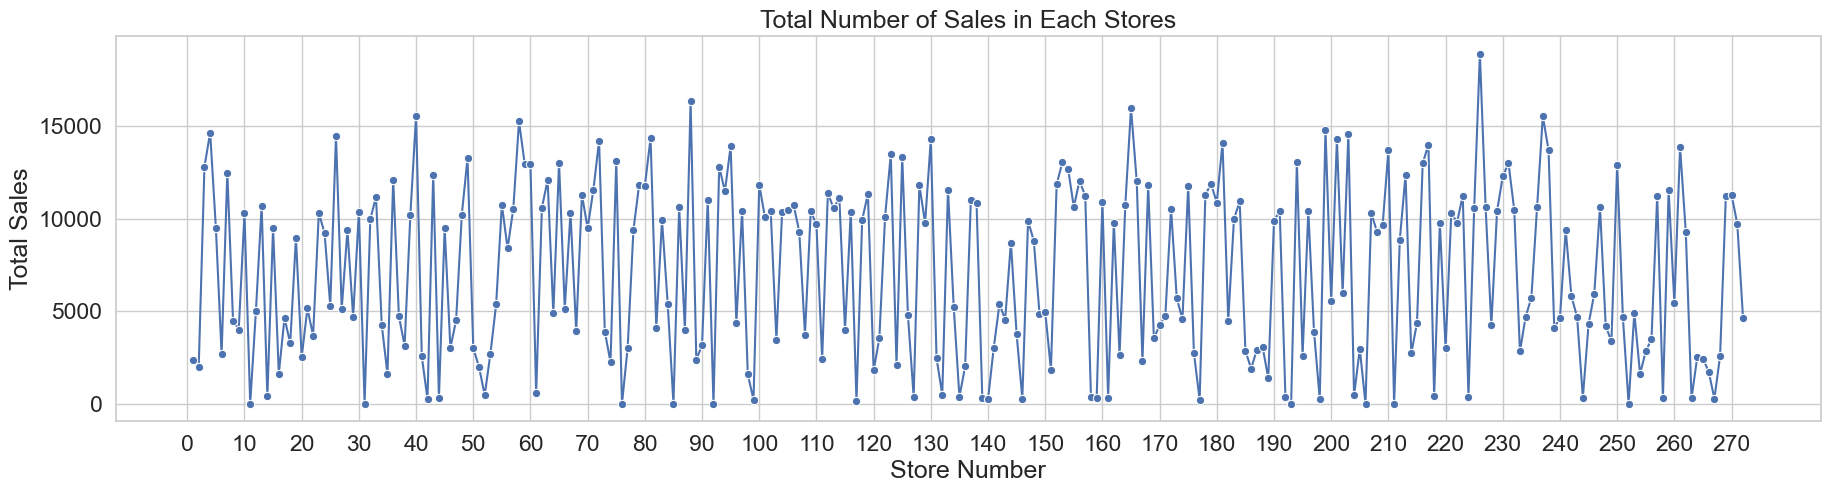

In [60]:
#What are the total number of chips sold in individual stores?
#This question will help us to find the number of stores that have less sales of chips. so that we can either do some advertisement 
#in those stores to increase the chips sales are we can either decrease the chips quantity 
#as per the store needs.
X = df.groupby("STORE_NBR")["TOT_SALES"].sum()
str_nbr = X.keys()
sales = X.tolist()

sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize=(22,5))
sns.lineplot(x=str_nbr, y = sales ,marker="o")
plt.xticks(range(0,272,10))
plt.title("Total Number of Sales in Each Stores")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

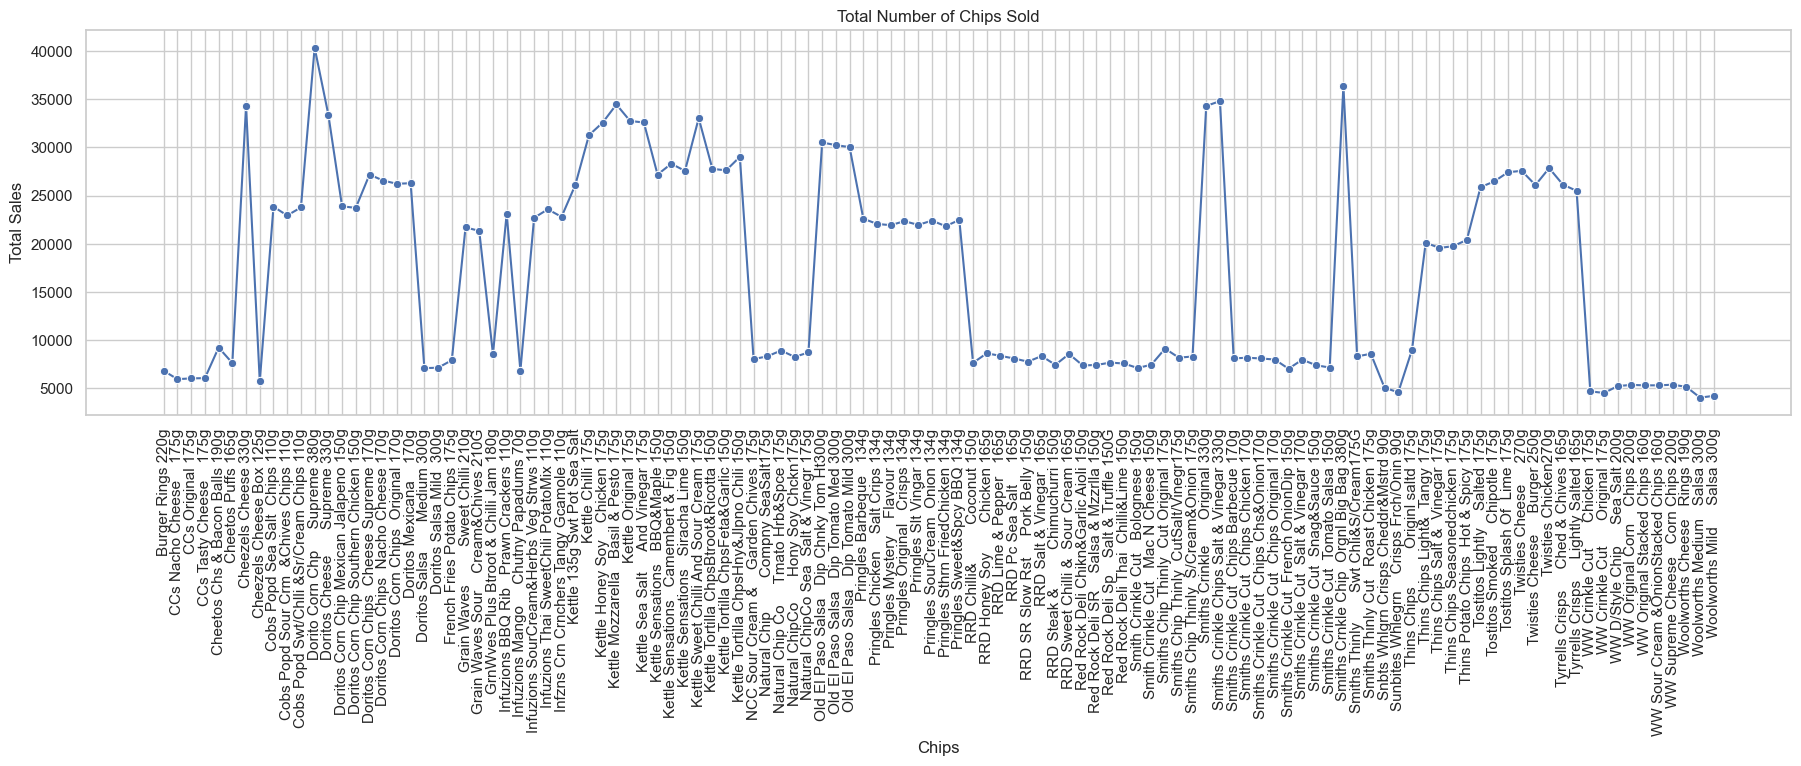

In [61]:
#What are the total number of chip products sold?
#This question will help us to find that which product of chips are mostly sold and which are not, 
#so that we can able to increase the quantity of the chips that are mostly sold 
#and we can able to reduce the quantity of chips that are less sold.X = df.groupby("PROD_NAME")["TOT_SALES"].sum()
X = df.groupby("PROD_NAME")["TOT_SALES"].sum()
prod = X.keys()
sales = np.round(X.tolist())

sns.set(font_scale=1, style="whitegrid")
plt.figure(figsize=(22,5))
sns.lineplot(x=prod, y = sales,marker="o")
plt.title("Total Number of Chips Sold")
plt.xlabel("Chips")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [62]:
# Вибірка даних: обирає два стовпці ("STORE_NBR" і "TOT_SALES") з DataFrame merged_data
# та групує їх за унікальними значеннями "STORE_NBR".
# Потім обчислює середнє значення "TOT_SALES" для кожної групи "STORE_NBR".
Store_sales = merged_data[["STORE_NBR","TOT_SALES"]].groupby(["STORE_NBR"]).sum()
# Сортуємо DataFrame за значенням стовпця "TOT_SALES" у порядку зростання
sorted_store_sales = Store_sales.sort_values(by='TOT_SALES')
# Виводимо відфільтровані дані
print(sorted_store_sales)

           TOT_SALES
STORE_NBR           
211             5.20
76              6.00
11              6.70
252             7.40
206             7.60
...              ...
237         15539.50
40          15559.50
165         15973.75
88          16333.25
226         17605.45

[272 rows x 1 columns]


In [63]:
# Assuming you have already merged the DataFrames
merged_data = pd.merge(pur, tran, on="LYLTY_CARD_NBR", how="right")

# Now, add the "LIFESTAGE" and "PREMIUM_CUSTOMER" columns to the "tran" DataFrame
tran = pd.merge(tran, pur[["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]], on="LYLTY_CARD_NBR", how="left")

# Display the first few rows of the updated "tran" DataFrame
print(tran.head())

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  2018-10-17          1            1000       1         5   
1  2019-05-14          1            1307     348        66   
2  2019-05-20          1            1343     383        61   
3  2018-08-17          2            2373     974        69   
4  2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Bu

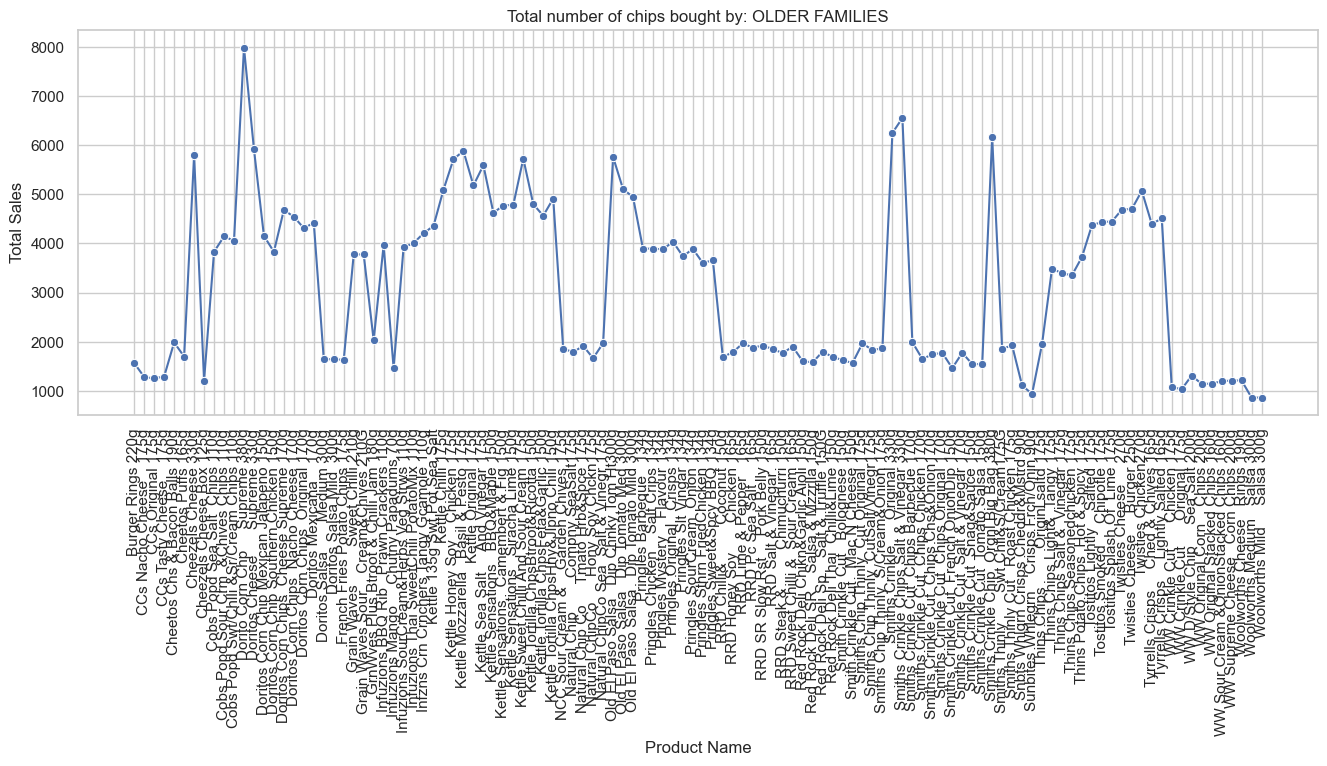

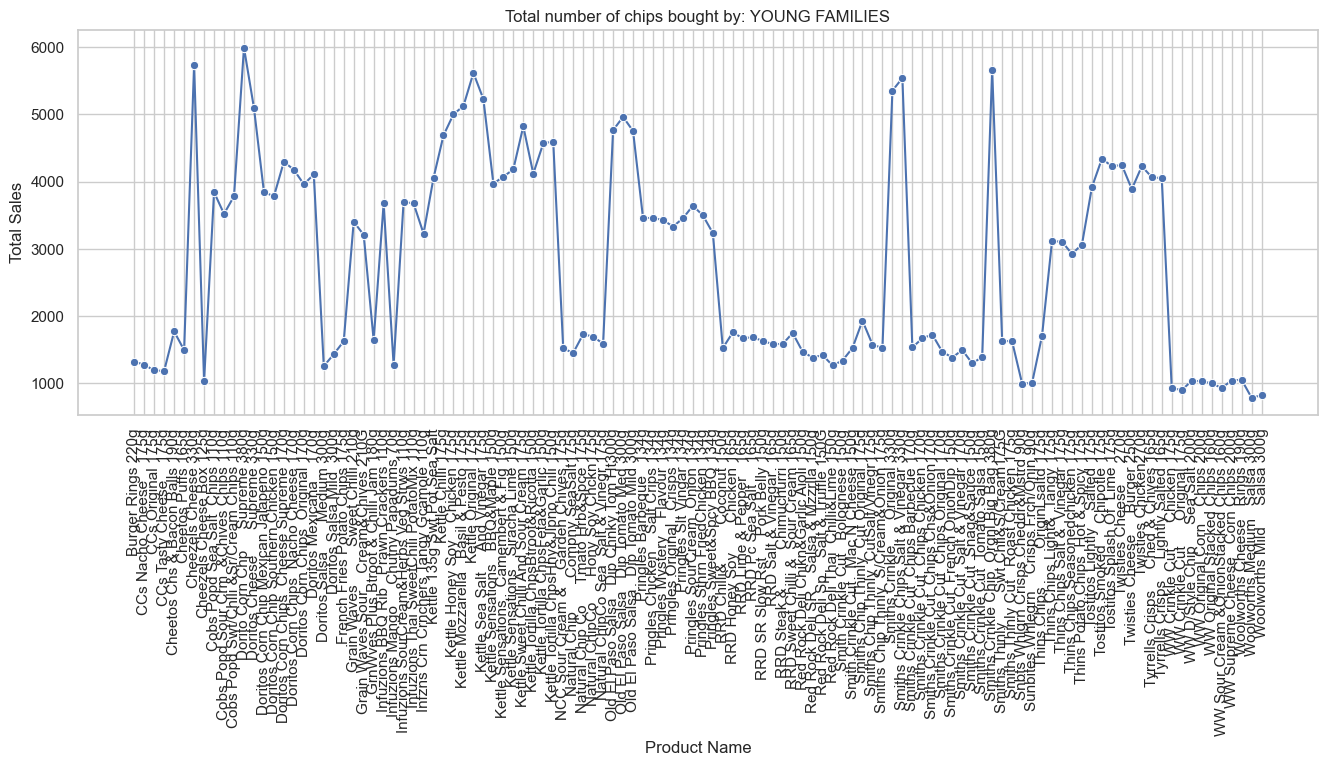

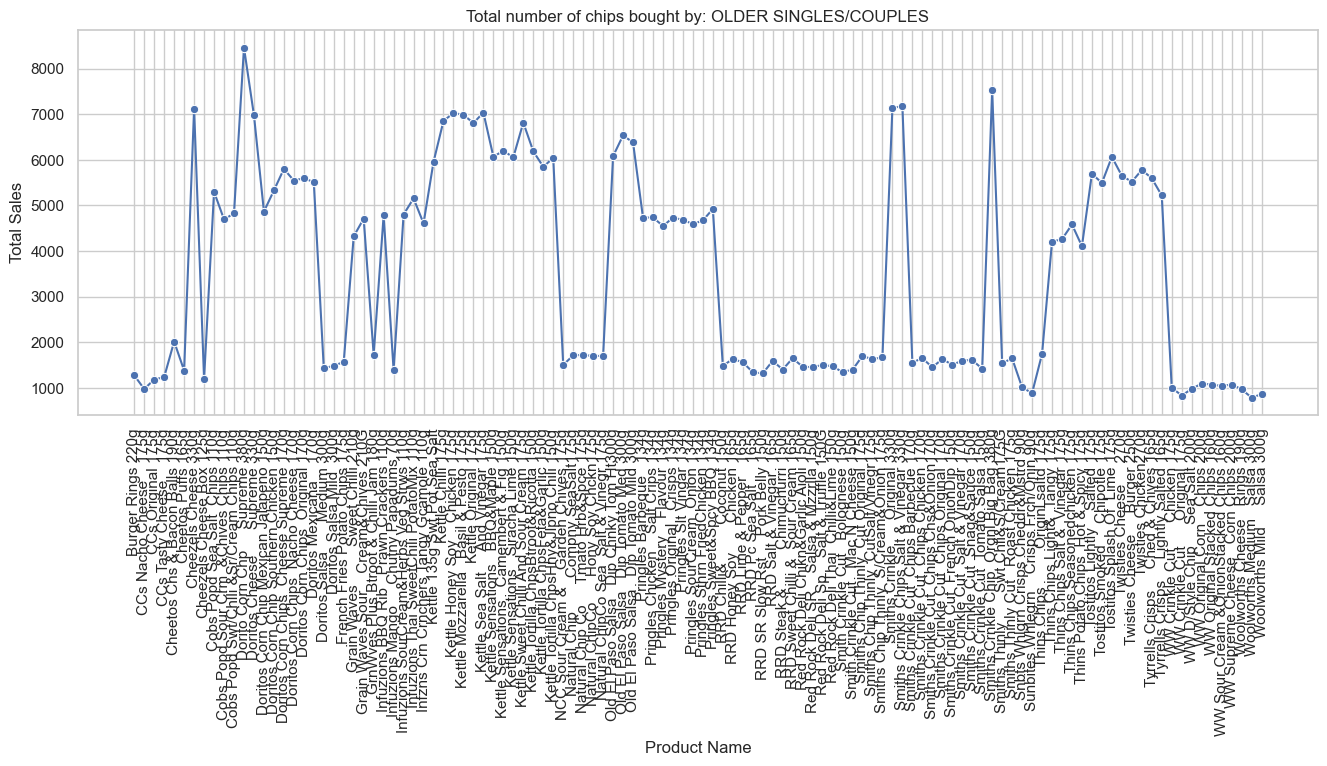

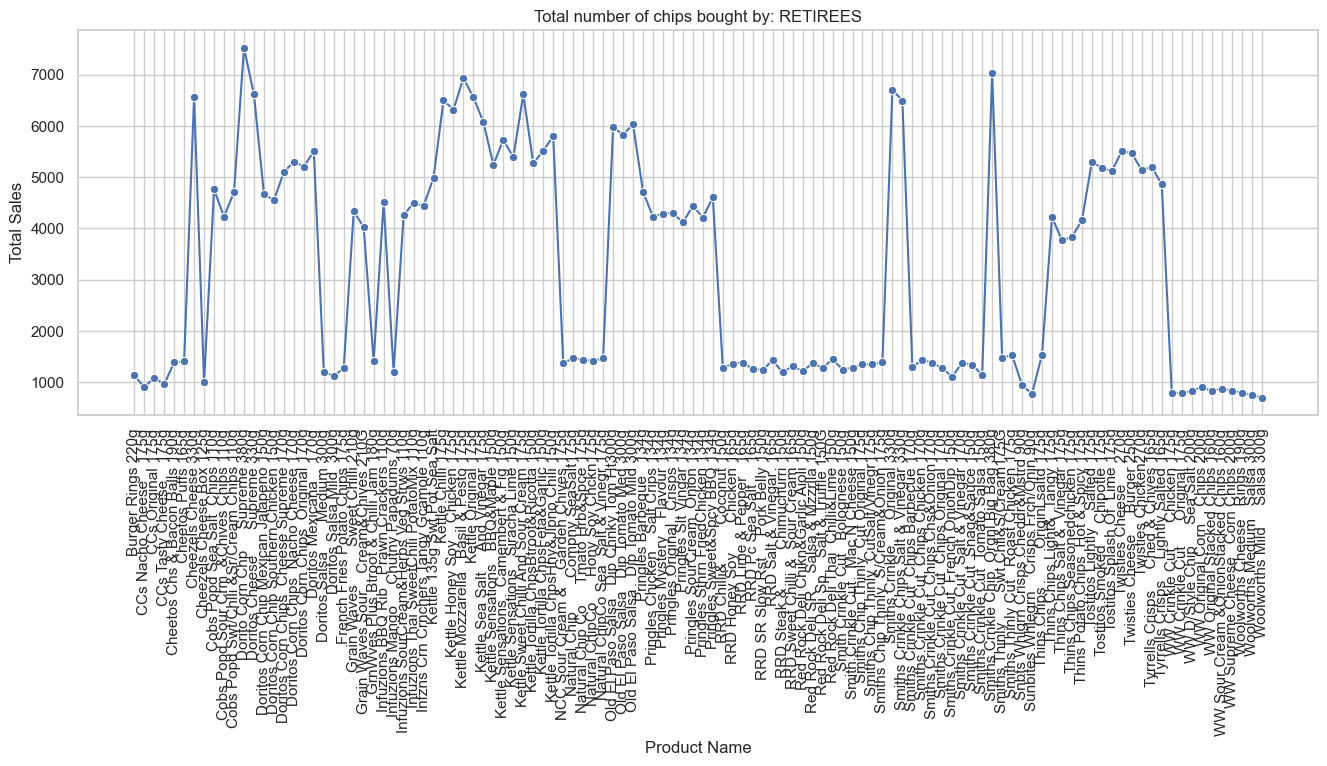

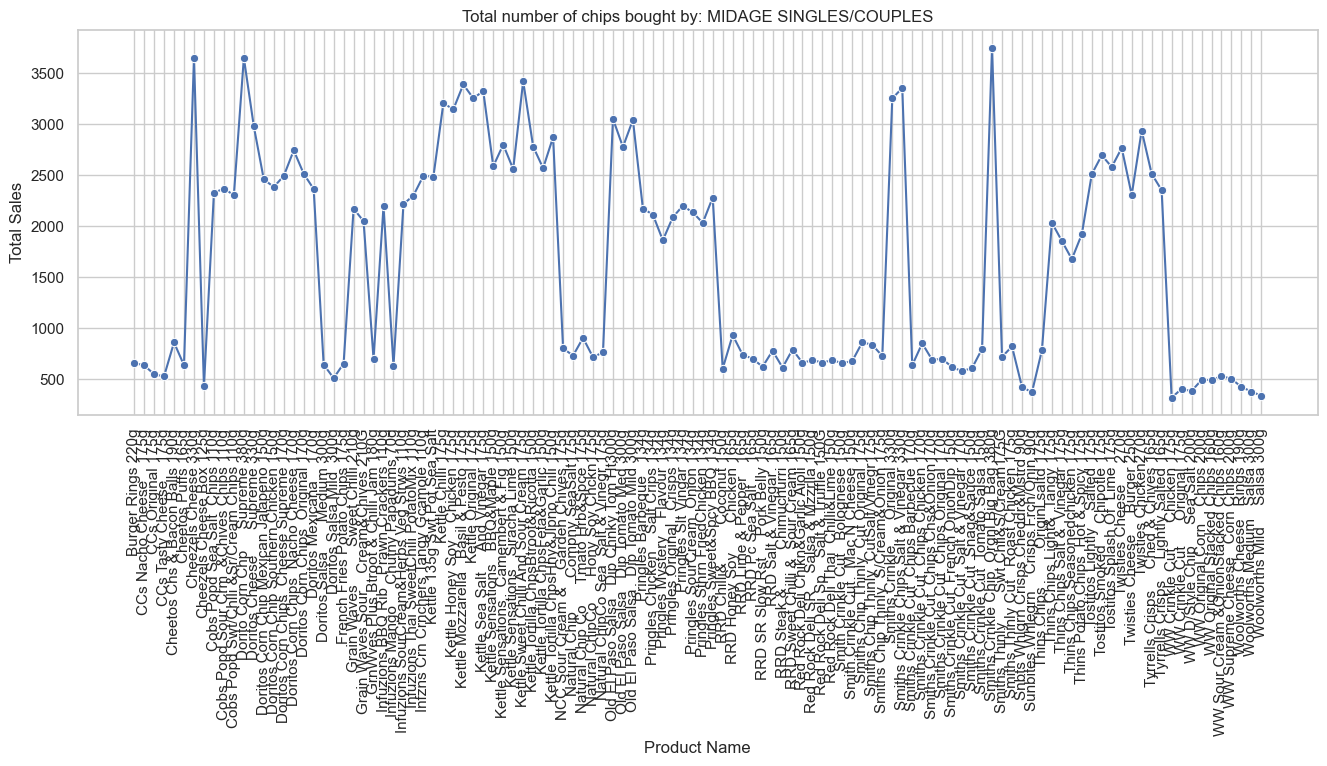

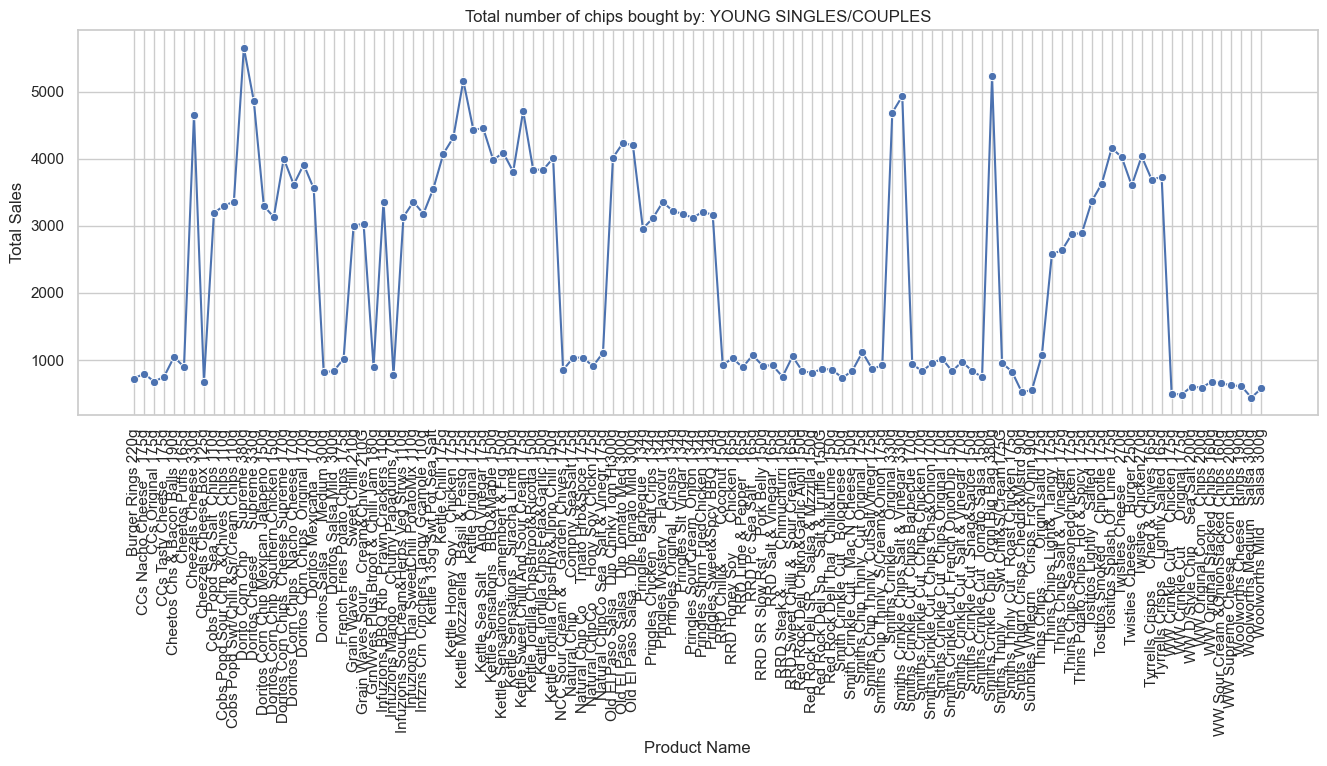

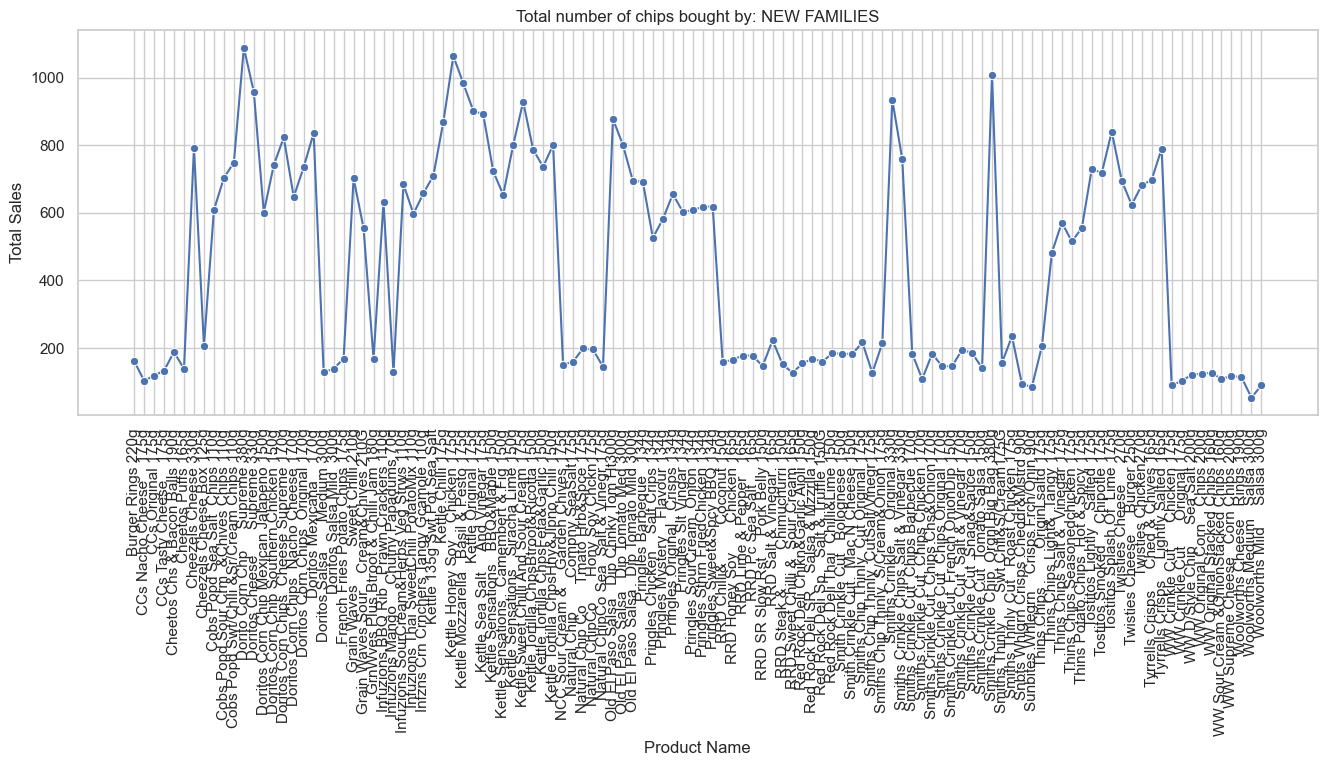

In [64]:
#Which group of people loves what product of chips?
#This question will help us to find which group of people loves what product of chips so that it will be easy to target those group of people.

def life_stage(stage, prod_title):
    X = merged_data[merged_data["LIFESTAGE"] == stage]
    Y = X.groupby("PROD_NAME")['TOT_SALES'].sum()

    plt.figure(figsize=(16, 5))
    plt.title("Total number of products sold")
    sns.lineplot(x=Y.keys(), y=Y.tolist(), marker="o")
    plt.xticks(rotation=90)
    plt.title("Total number of chips bought by: " + prod_title)
    plt.xlabel("Product Name")
    plt.ylabel("Total Sales")

    print()
    plt.show()

life_stage("OLDER FAMILIES", "OLDER FAMILIES")
life_stage("YOUNG FAMILIES", "YOUNG FAMILIES")
life_stage("OLDER SINGLES/COUPLES", "OLDER SINGLES/COUPLES")
life_stage("RETIREES", "RETIREES")
life_stage("MIDAGE SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES")
life_stage("YOUNG SINGLES/COUPLES", "YOUNG SINGLES/COUPLES")
life_stage("NEW FAMILIES", "NEW FAMILIES")

In [65]:
def total_sales_by_group(df):
    result = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().sort_values(ascending=False)
    return result

# Example usage
sales_by_group = total_sales_by_group(merged_data)
print(sales_by_group)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              168363.25
YOUNG SINGLES/COUPLES   Mainstream          157621.60
RETIREES                Mainstream          155677.05
YOUNG FAMILIES          Budget              139345.85
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132263.15
RETIREES                Budget              113147.80
OLDER FAMILIES          Mainstream          103445.55
RETIREES                Premium              97646.05
YOUNG FAMILIES          Mainstream           92788.75
MIDAGE SINGLES/COUPLES  Mainstream           90803.85
YOUNG FAMILIES          Premium              84025.50
OLDER FAMILIES          Premium              81958.40
YOUNG SINGLES/COUPLES   Budget               61141.60
MIDAGE SINGLES/COUPLES  Premium              58432.65
YOUNG SINGLES/COUPLES   Premium              41642.10
MIDAGE SINGLES/COUPLES  Budget           

In [66]:
def count_by_date(df):
    result = df.groupby(["DATE"])["PROD_QTY"].sum().sort_values(ascending=False)
    return result

# Example usage
total_count_by_date = count_by_date(merged_data)
print(total_count_by_date)

DATE
2018-12-24    1818
2018-12-23    1771
2018-12-22    1746
2018-12-19    1734
2018-12-18    1651
              ... 
2018-08-17    1148
2019-05-17    1120
2018-08-20    1108
2019-05-15    1066
2019-05-18    1064
Name: PROD_QTY, Length: 364, dtype: int64


In [67]:
def sales_by_date(df):
    result = df.groupby(["DATE"])["TOT_SALES"].sum().sort_values(ascending=False)
    return result

# Example usage
total_sales_by_date = sales_by_date(merged_data)
print(total_sales_by_date)

DATE
2018-12-24    6923.00
2018-12-23    6826.00
2018-12-19    6639.80
2018-12-22    6558.70
2018-12-20    6300.80
               ...   
2019-05-14    4310.45
2018-08-20    4198.20
2019-05-17    4192.45
2019-05-15    4060.30
2019-05-18    4036.50
Name: TOT_SALES, Length: 364, dtype: float64


In [68]:
# Посмотреть первые несколько строк DataFrame
print(merged_data.head())

# Общая информация о DataFrame
print(merged_data.info())

# Основные статистические характеристики числовых полей
print(merged_data.describe())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER        DATE  \
0            1000   YOUNG SINGLES/COUPLES          Premium  2018-10-17   
1            1307  MIDAGE SINGLES/COUPLES           Budget  2019-05-14   
2            1343  MIDAGE SINGLES/COUPLES           Budget  2019-05-20   
3            2373  MIDAGE SINGLES/COUPLES           Budget  2018-08-17   
4            2426  MIDAGE SINGLES/COUPLES           Budget  2018-08-18   

   STORE_NBR  TXN_ID  PROD_NBR                                 PROD_NAME  \
0          1       1         5    Natural Chip        Compny SeaSalt175g   
1          1     348        66                  CCs Nacho Cheese    175g   
2          1     383        61    Smiths Crinkle Cut  Chips Chicken 170g   
3          2     974        69    Smiths Chip Thinly  S/Cream&Onion 175g   
4          2    1038       108  Kettle Tortilla ChpsHny&Jlpno Chili 150g   

   PROD_QTY  TOT_SALES  
0         2        6.0  
1         3        6.3  
2         2        2.9 

In [70]:
# Convert the 'DATE' column to datetime type
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Create a new column 'Month'
merged_data['Month'] = merged_data['DATE'].dt.to_period('M')

# Group the data by months and products, summing the quantity sold
monthly_sales = merged_data.groupby(['Month', 'PROD_NAME'])['PROD_QTY'].sum().reset_index()

# Find the product that sold the most in each month
top_selling_products = monthly_sales.loc[monthly_sales.groupby('Month')['PROD_QTY'].idxmax()]

print(top_selling_products)

        Month                                 PROD_NAME  PROD_QTY
13    2018-07   Doritos Corn Chip Mexican Jalapeno 150g       574
125   2018-08          Dorito Corn Chp     Supreme 380g       706
282   2018-09           Pringles Original   Crisps 134g       582
350   2018-10            Cobs Popd Sea Salt  Chips 110g       581
514   2018-11              Pringles Sweet&Spcy BBQ 134g       630
671   2018-12                      Twisties Chicken270g       610
726   2019-01  Kettle Tortilla ChpsHny&Jlpno Chili 150g       613
808   2019-02  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g       540
1014  2019-03    Tyrrells Crisps     Ched & Chives 165g       593
1048  2019-04     Grain Waves         Sweet Chilli 210g       567
1151  2019-05          Dorito Corn Chp     Supreme 380g       687
1287  2019-06    Kettle Mozzarella   Basil & Pesto 175g       575


In [71]:
# Convert the 'DATE' column to datetime type
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Create a new column 'Month'
merged_data['Month'] = merged_data['DATE'].dt.to_period('M')

# Group the data by months and products, summing the total sales
monthly_sales = merged_data.groupby(['Month', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

# Find the product with the highest total sales in each month
top_selling_products = monthly_sales.loc[monthly_sales.groupby('Month')['TOT_SALES'].idxmax()]

print(top_selling_products)

        Month                               PROD_NAME  TOT_SALES
11    2018-07        Dorito Corn Chp     Supreme 380g    3542.50
125   2018-08        Dorito Corn Chp     Supreme 380g    3617.25
240   2018-09        Doritos Cheese      Supreme 330g    3226.20
353   2018-10        Dorito Corn Chp     Supreme 380g    3386.50
467   2018-11        Dorito Corn Chp     Supreme 380g    3555.50
603   2018-12  Kettle Mozzarella   Basil & Pesto 175g    3245.40
695   2019-01        Dorito Corn Chp     Supreme 380g    3321.50
809   2019-02        Dorito Corn Chp     Supreme 380g    3217.50
923   2019-03        Dorito Corn Chp     Supreme 380g    3627.00
1102  2019-04       Smiths Crinkle      Original 330g    3174.90
1151  2019-05        Dorito Corn Chp     Supreme 380g    3480.75
1265  2019-06        Dorito Corn Chp     Supreme 380g    3419.00


In [74]:
# Convert the 'DATE' column to datetime type
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Group the data by products, summing the total quantity sold
annual_sales = merged_data.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()

# Find the product with the highest total quantity sold for the entire year
top_selling_product = annual_sales.loc[annual_sales['PROD_QTY'].idxmax()]

# Display the result in Shapely format
print(f"The top-selling product for the entire year is {top_selling_product['PROD_NAME']} "
      f"with total quantity sold of {top_selling_product['PROD_QTY']} units.")

The top-selling product for the entire year is Dorito Corn Chp     Supreme 380g with total quantity sold of 6509 units.


In [75]:
# Convert the 'DATE' column to datetime type
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Group the data by products, summing the total sales
annual_sales = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Find the product with the highest total sales for the entire year
top_selling_product = annual_sales.loc[annual_sales['TOT_SALES'].idxmax()]

# Display the result in Shapely format
print(f"The top-selling product for the entire year is {top_selling_product['PROD_NAME']} "
      f"with total sales of ${top_selling_product['TOT_SALES']:.2f}")

The top-selling product for the entire year is Dorito Corn Chp     Supreme 380g with total sales of $40352.00
